# Providing data-driven suggestions for HR
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to **analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company**.

If you can predict employees likely to quit, it might be possible to **identify factors that contribute to their leaving.** Because it is time-consuming and expensive to find, interview, and hire new employees, **increasing employee retention** will be beneficial to the company.

## DATASET
The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [53]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit 
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle
from datetime import datetime


#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings


In [54]:
df0 = pd.read_csv("/kaggle/input/hr-capstone-dataset/HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [56]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [57]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [58]:
columns = ('satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary')
df0.columns = columns

# Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No null/missing values detected

In [60]:
# Check for duplicates
df0.duplicated().sum()

3008

In all, 3008 duplicate rows are discovered in the dataset. It is highly unlikely that all the fields are same for 2 or more employees, so this has to be error in the data set and these data rows need to be removed for analysis.

In [61]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df0.shape[0] - df1.shape[0]

3008

3008 rows dropped from the original dataset.
Now we check outliers in the dataset( in tenure). 

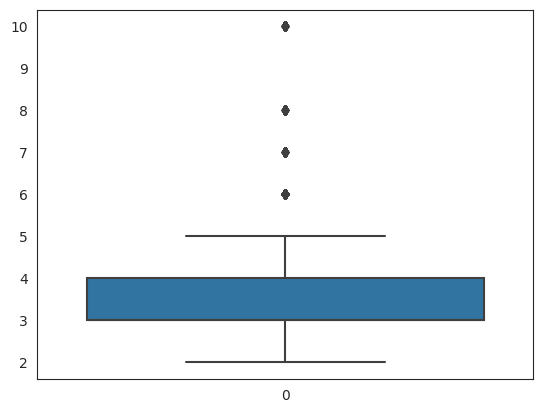

In [62]:
sns.boxplot(df1['tenure']);


There seem to be a few outliers in the field. Where most values (100 percentile) lie below 5, there are a few values going upto 10

In [63]:
# Determine the number of rows containing outliers
df1[df1['tenure']>5].shape

q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(f"Upper limit:{upper_limit}")
print(f"Lower Limit:{lower_limit}")

outliers = df1[(df1['tenure']>upper_limit) | (df1['tenure']<lower_limit)]

print(f"Numbers of outliers in the tenure column: {len(outliers)}")

Upper limit:5.5
Lower Limit:1.5
Numbers of outliers in the tenure column: 824


There are 824 outliers in the tenure column. We can choose to remove or keep the outliers based on the type of model we use for the prediction task.

## Exploratory Data Analysis

In [64]:
# Numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print("\n")
print("left Vs stayed:\n",df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64


left Vs stayed:
 left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In the dataset, there are 1991 or 16.6% employees who have left the organization. This is not a very balanced dataset with the majority class (who stayed) making up more than 83% of the dataset. This information will be used while creating the training & test datasets where we can stratify the data so that each data split has proportional values from both the classes

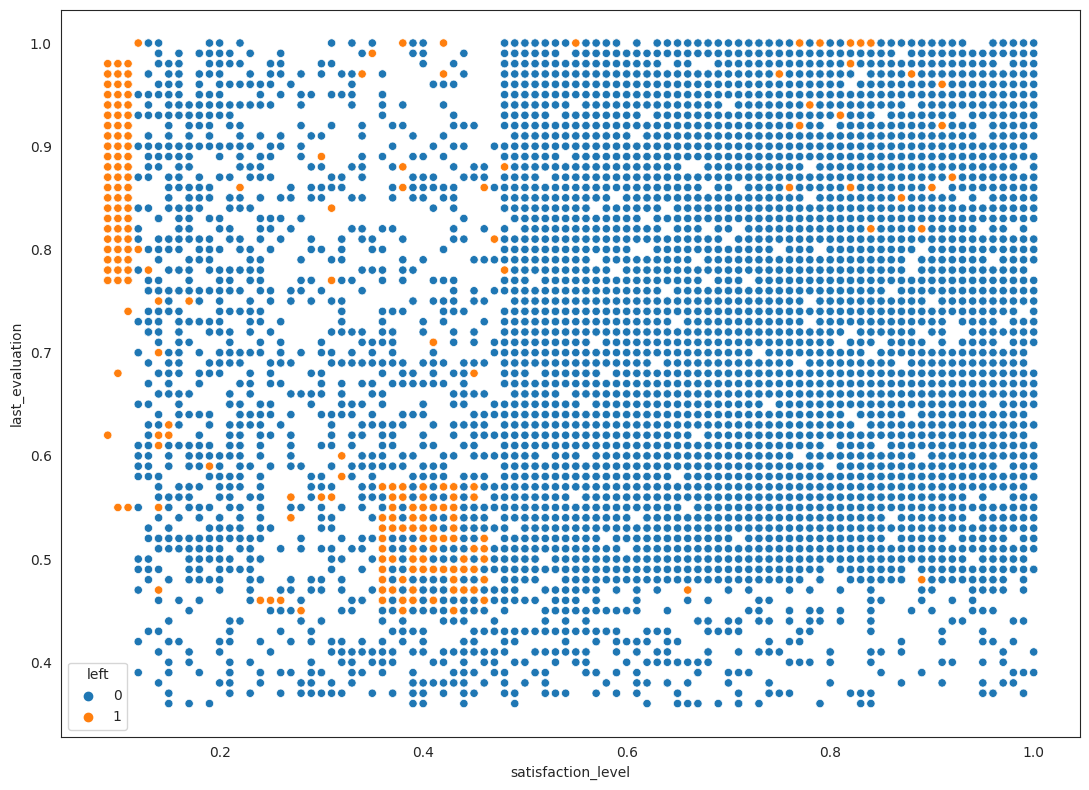

In [65]:
#Satisfaction Vs Evaluation in light of attrition
plt.figure(figsize= (11,8))
sns.scatterplot(x=df1['satisfaction_level'],y=df1['last_evaluation'],hue = df1['left'])
plt.tight_layout()

There seems to be groups of employees at specific satisfaction & evaluation junctures who have left the company.

The first group comprises of employees who are not satisfied and have low evaluation scores as well.

The other group comprises of employees who scored very high (0.8+) in the evaluation scale but are extremely dissatisfied.

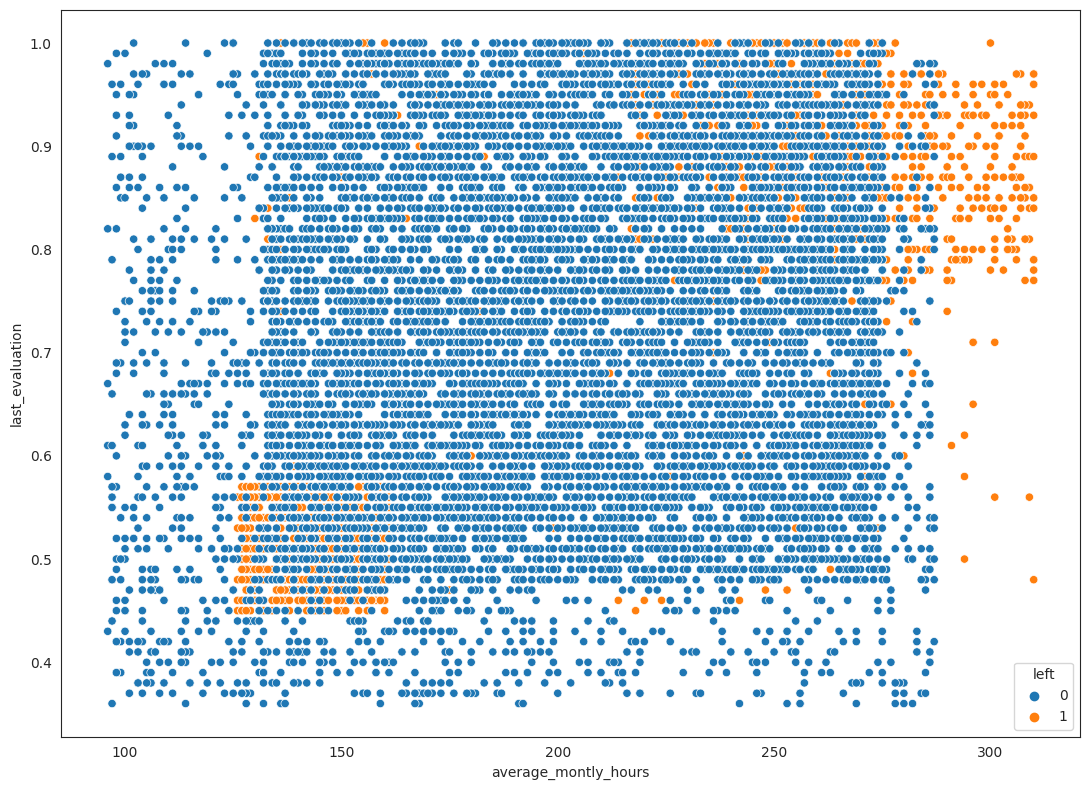

In [66]:
#average_monhtly_hours Vs Evaluation in light of attrition

plt.figure(figsize= (11,8) )
sns.scatterplot(x=df1['average_montly_hours'],y=df1['last_evaluation'],hue = df1['left'])
plt.tight_layout()

On plotting average_monthly_hours with las_evaluation, here's what we learn -

1. There are two types of people leaving the organization. One group that works the most (almost 300 hours in a month), and is evaluated highly. These people must be high performers but may be facing a burnout or new opportunities elsewhere. The other group consists of the employees that work less (almost 150 hours a month) compared to others and are evaluated less than 0.5. These people may have madeup their minds to leave thus working lesser hours or they might have left becuase of lower evaluation ratings

2. Ignoring the leaves/holidays, with 52 weeks in a year and 40 hours a week, the usual working hours a month should be (52*40)/12 = 173 hours. It seems like most of the employees in the organization are over worked. Let's redo the chart.

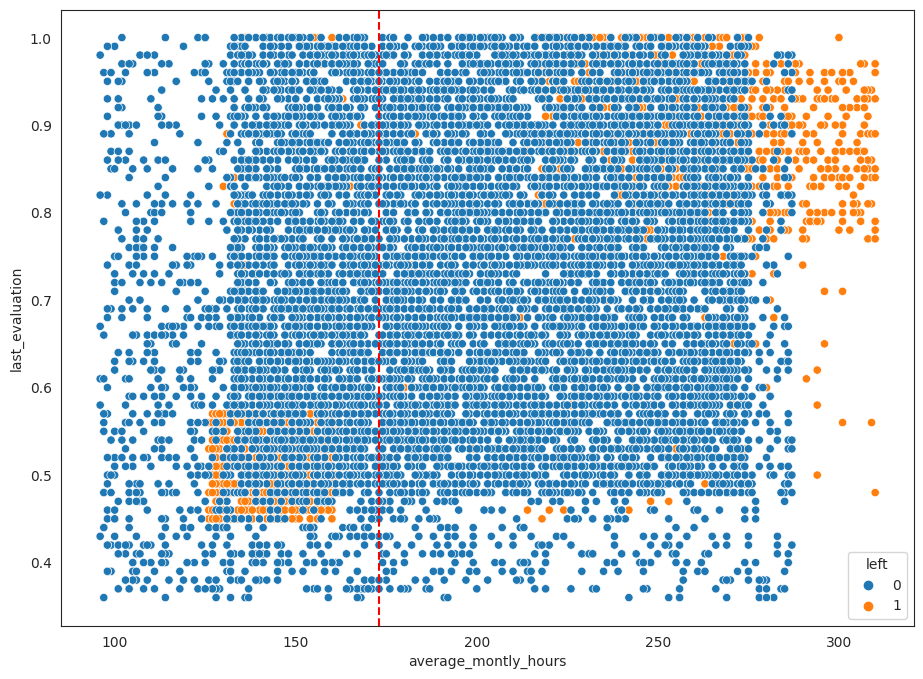

In [67]:
plt.figure(figsize= (11,8) )
sns.scatterplot(x=df1['average_montly_hours'],y=df1['last_evaluation'],hue = df1['left'])
plt.axvline(x=173, color='red', label='173 hrs./mo.', ls='--')
plt.show();

Most employees work way more than regulated monthly hours. This can be a company-wide issue and something the management should take note of

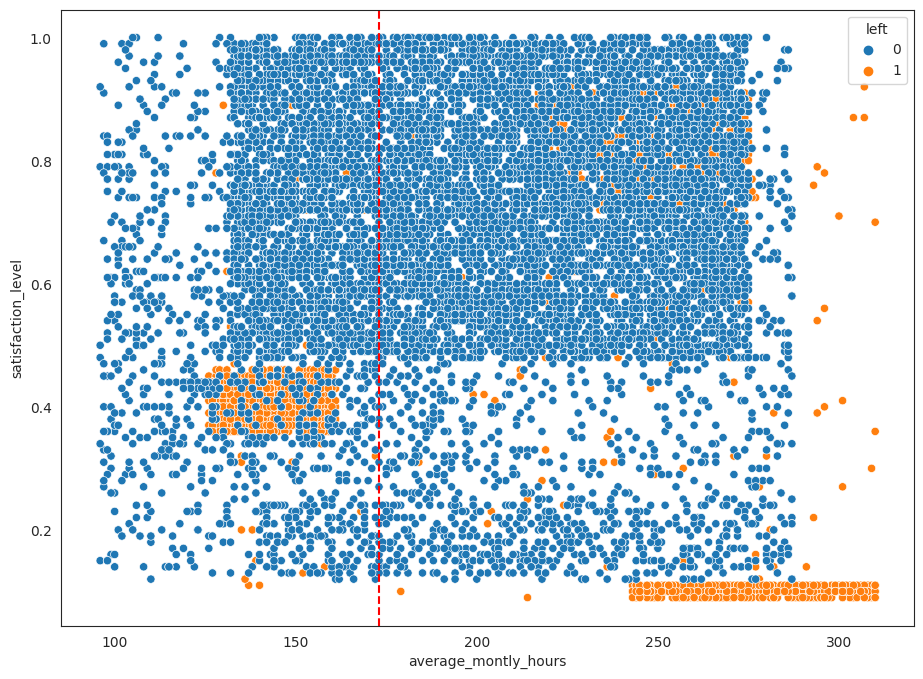

In [68]:
plt.figure(figsize= (11,8))
sns.scatterplot(x = df1['average_montly_hours'], y=df1['satisfaction_level'], hue = df1['left'])
plt.axvline(x=173, color='red', label='173 hrs./mo.', ls='--')
plt.show();

1. Low satisfaction seems to be a big factor in leaving the company. Especially for people working the longest hours (250-300), satisfaction is at the lowest. These are a big group of people leaving.

2. The second biggest group have a slightly higher satisfaction level(around 0.4) and they work less than the over-worked (173 hours) threshold.

3. The employees which are not overworked, and are highly satisfied don't seem to leave the company, which seems rational.

4. Most employees who have left have a satisfaction level less than 0.5, which can be an early indication of an employee looking to quit.

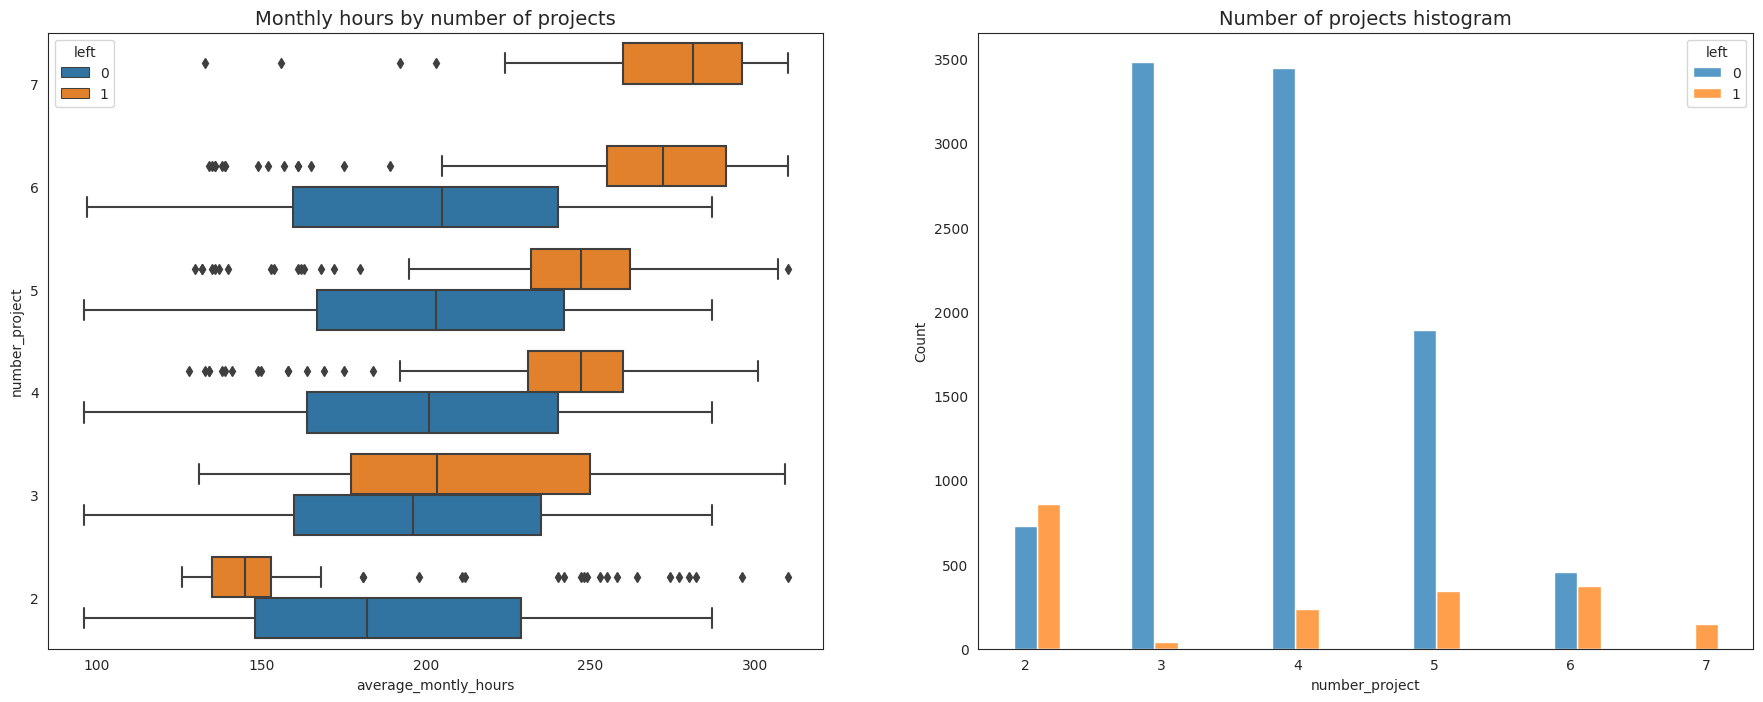

In [69]:
#understanding projects, working hours
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show();

Employees with 3-4 projects are least likely to leave (proportionally). Empployees with 6-7 projects work most hours monthly on an average and are more likely to leave. Particularly all employees with 7 projects have left the company.

Another group of employees that is more susceptible to leaving the company comprises of employees with 2 projects where proportionally more employees have left than stayed

In [70]:
#comfirming - all employees with 7 projects have left
df1[df1['number_project'] > 6]['left'].value_counts()

left
1    145
Name: count, dtype: int64

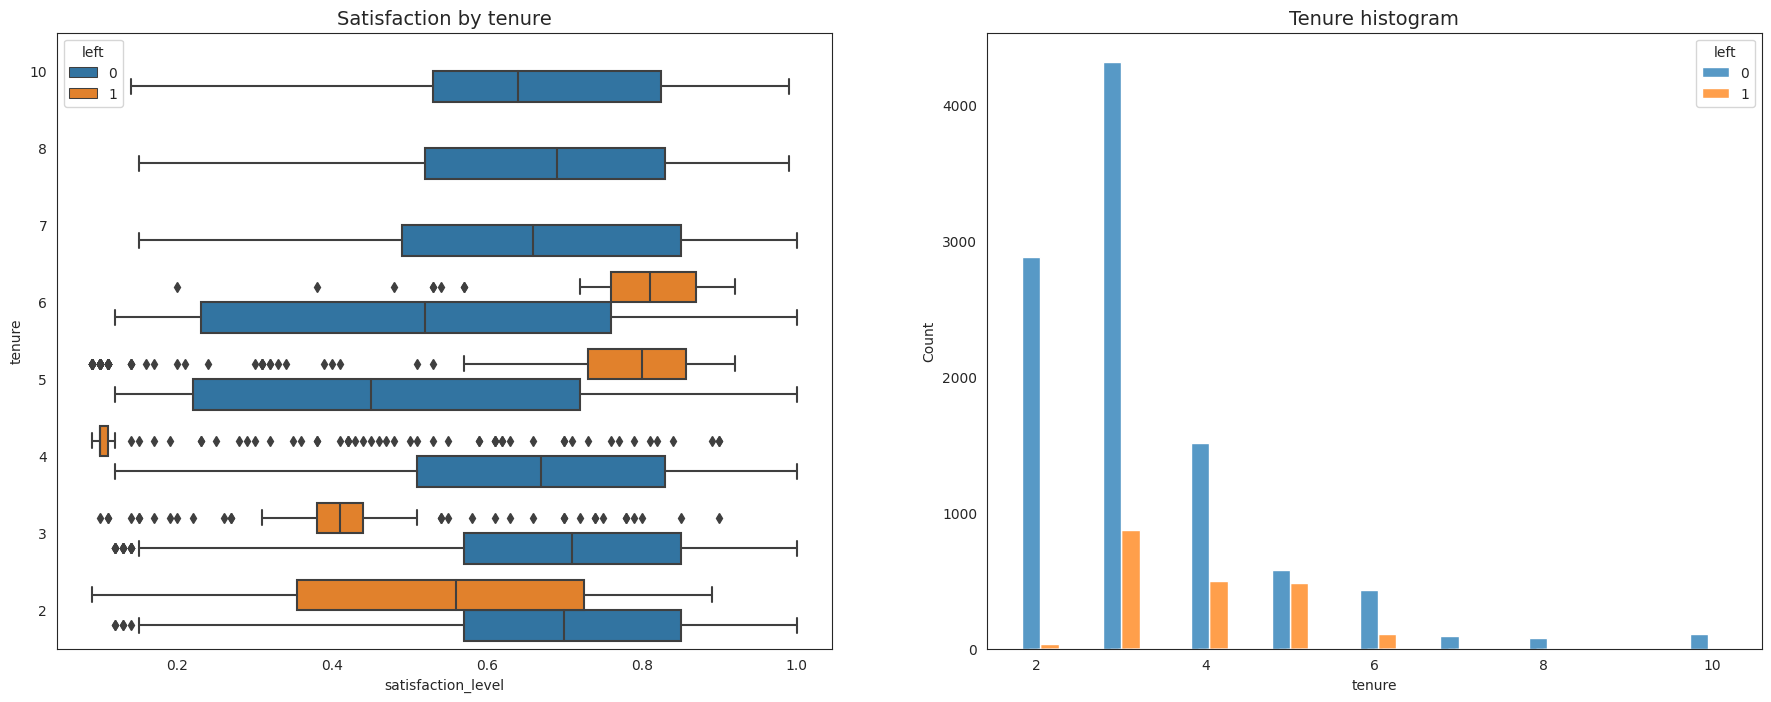

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

More employees with low and medium term tenures left than those with higher tenures (Although there are very few employees with more than 6 years of tenure). Employees who left at 4 years of tenure have extremely low satisfaction level.

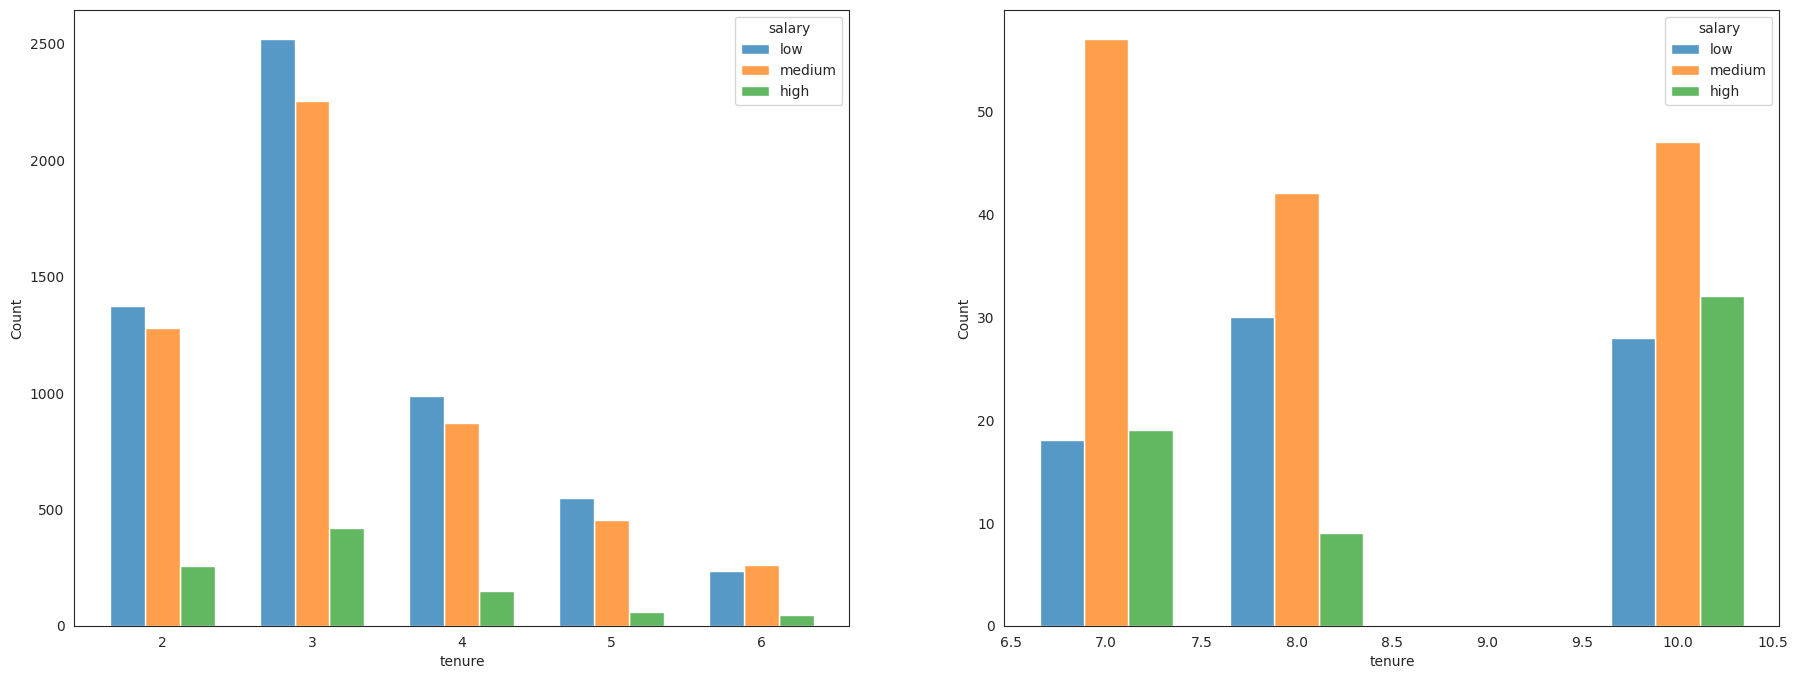

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

df_lowtenure = df1[df1['tenure']<=6]
df_hightenure = df1[df1['tenure']>6]

sns.histplot(data = df_lowtenure, x = 'tenure', hue = 'salary', discrete= 1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.7, ax = ax[0])

sns.histplot(data = df_hightenure, x = 'tenure', hue = 'salary', discrete= 1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.7, ax = ax[1])

plt.show();

The distribution of salary (low, medium, high) seems to be normal across the tenure years. Low salaries have higher instances in 1-5 years, but the salaries in the higher tenures isnt disporportionally high as well.


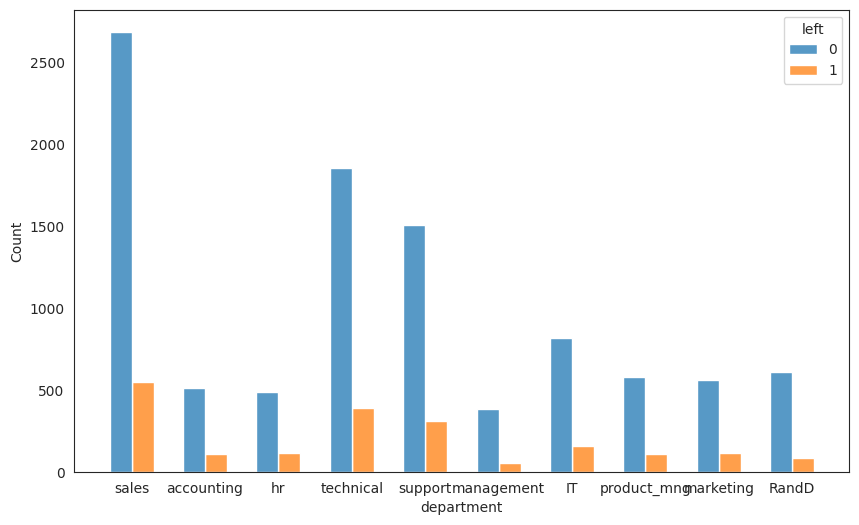

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple='dodge', shrink=0.6);

There is no clear pattern of employee attrition in relation to departments.

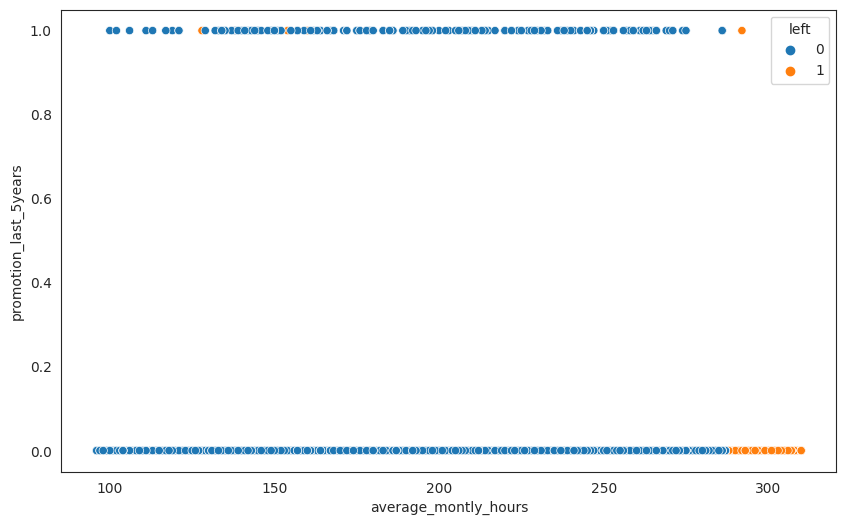

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df1, x = 'average_montly_hours', y='promotion_last_5years', hue = 'left');

Most employees leaving the company weren't promoted in the last 5 years. But this doesnt tell the complete picture.
Since in one of the previous charts, we have seen that many employees who left have a tenure of 2,3, or 4 years, they may not eligible for **promotion in last 5 years**



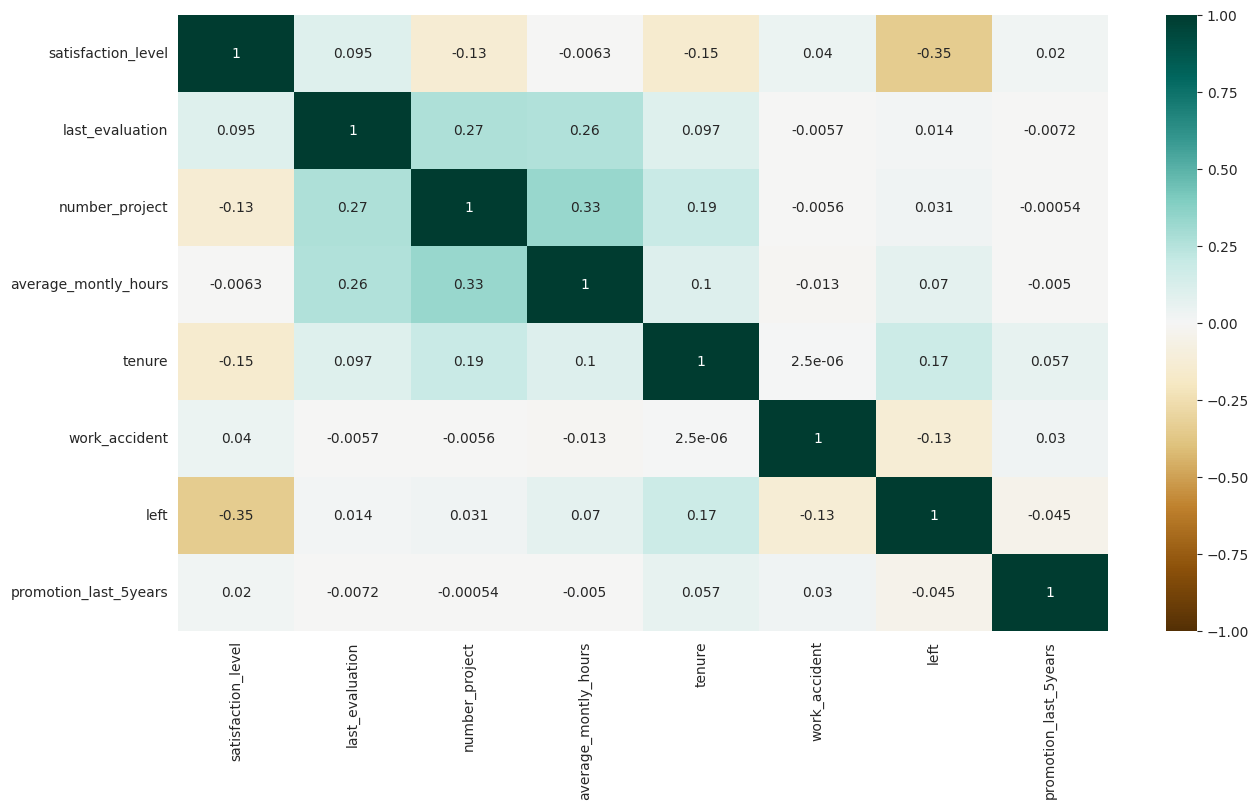

In [75]:
sns.set_style('white')

plt.figure(figsize=(15,8))

sns.heatmap(df1.corr(numeric_only=True),annot=True,vmin=-1, vmax = 1,cmap= 'BrBG');

As evident from the heatmap, satisfaction level and leaving are moderately (negatively) correlated. Also there seems to be slight correlation among number of projects, evaluation and average monthly hours.

## Insights - 
1. Tenure, number of projects, promotion, working hours, satisfaction levels and employee evaluation play important role in employee attrition and retention. There are some correlations between these features that need further evaluation

# Model Construction


### **A Logistic Regression was run on the dataset but it didnt perform too well. Results were not acceptable with F1 of 0.33 and precision of 0.44, which means it was missing more possitives (left) than identifying**

## Decision Tree

There are two categorical variables (Department, Salary) left. Before proceeding we need to change them to numerical features for Logistic regression or decision trees to work. 

salary is a ordinal feature, as in, high is more than medium which is more than low. So we cannot one hot encoding for this variable. Instead we can convert the hierarchy to numbers.

department can be dummy enocded it as usual


In [76]:
df_encoded = df1.copy()

df_encoded['salary'] = (
    df_encoded['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [77]:
#one hot encoding for the department
df_encoded = pd.get_dummies(df_encoded, drop_first=False)

In [78]:
y = df_encoded['left']
X = df_encoded
X = X.drop(columns = 'left',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 42)

In [79]:
cv_params = {'max_depth': [2,8,10,None],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
dt = DecisionTreeClassifier()

dt_1 = GridSearchCV(dt,cv_params,scoring = scoring, cv = 5, refit = 'f1')

In [80]:
%%time
dt_1.fit(X_train,y_train)

CPU times: user 6.14 s, sys: 1.96 ms, total: 6.14 s
Wall time: 6.16 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [81]:
print(f'F1 score for the best set of hyperparameters: {dt_1.best_score_}')

F1 score for the best set of hyperparameters: 0.9452035041056204


In [82]:
dt_1.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [83]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy]
                        })
  
    return table

In [84]:
tree1_cv_results = make_results('decision tree cv', dt_1, 'f1')
tree1_cv_results

,model,precision,recall,f1,accuracy
0,decision tree cv,0.973214,0.918947,0.945204,0.982319


Good f1 score. The model does well in classifying the variable(left). Other metrics are high as well.
98.23% accuracy means than the model correctly predicts the Left values for 98.23% records.

In [85]:
dt_pred = dt_1.predict(X_test)

In [86]:

accuracy=accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

test_results = pd.DataFrame({'model': 'Decision_Tree_test',
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                         })
test_results

,model,precision,recall,f1,accuracy
0,Decision_Tree_test,0.972632,0.927711,0.94964,0.983656


The rsults improved further. The model performed even better on the test set.

In [87]:
all_results = pd.concat([tree1_cv_results, test_results]).sort_values(by=['f1'], ascending=False)
all_results

,model,precision,recall,f1,accuracy
0,Decision_Tree_test,0.972632,0.927711,0.949640,0.983656
0,decision tree cv,0.973214,0.918947,0.945204,0.982319


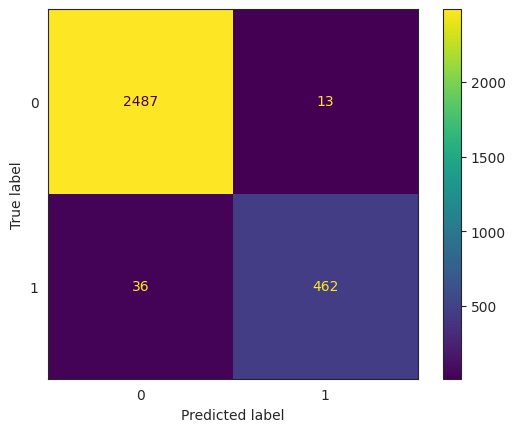

In [88]:
#Confusion Matrix
cm = confusion_matrix(y_test,dt_pred,labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dt_1.classes_)
disp.plot(values_format ='');

Low False Positives & False negatives in the prediction.
Very few (11) employees who left were tagged as not left, from the test set. This means that the model can predict the attrition with high accuracy.

In [110]:
dt_importance = pd.DataFrame(dt_1.best_estimator_.feature_importances_, 
             columns=['dt_gini_importance'],
             index=X.columns).sort_values(by='dt_gini_importance', ascending=False)


feature_importance = dt_importance[:10]
feature_importance

,dt_gini_importance
satisfaction_level,0.494657
last_evaluation,0.167871
number_project,0.130254
tenure,0.124432
average_montly_hours,0.081368
department_marketing,0.000344
salary,0.000338
department_IT,0.000286
department_support,0.000131
department_accounting,0.000105


In terms of features, satisfaction_level tops the list in importance, followed by last_evaluation. The other three important features are number of projects, tenure and average monthly hours.

This seems to be a good model. 

Now let's try a Random Forest model to see if it can deliver better predictability.

In [90]:
cv_params = {'n_estimators' : [50,100,300],
              'max_depth' : [8,10,20],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.8]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [91]:
rf = RandomForestClassifier()
rf_1 = GridSearchCV(rf,cv_params,scoring=scoring,cv=5, refit = 'f1')

### RF model training was throwing the following warning :
UndefinedMetricWarning: Precision is ill-defined and 
being set to 0.0 due to no predicted 
samples. Use `zero_division` parameter to control this behavior.

So we used "filterwarnings()"


In [92]:
%%time


import warnings
warnings.filterwarnings('ignore')
rf_1.fit(X_train,y_train)


CPU times: user 3min 38s, sys: 1.06 s, total: 3min 39s
Wall time: 3min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 20], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.8],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100, 300]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [93]:
rf_1.best_score_

0.9441470896216344

F1 score of the model is 0.947, slightly better than the single decision tree

In [94]:
rf_1.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 300}

In [95]:
rf_results = make_results('random forest cv', rf_1, 'f1')
rf_results

,model,precision,recall,f1,accuracy
0,random forest cv,0.98548,0.90622,0.944147,0.982208


In [96]:
all_results = pd.concat([all_results, rf_results]).sort_values(by=['f1'], ascending=False)

In [97]:
all_results

,model,precision,recall,f1,accuracy
0,Decision_Tree_test,0.972632,0.927711,0.949640,0.983656
0,decision tree cv,0.973214,0.918947,0.945204,0.982319
0,random forest cv,0.985480,0.906220,0.944147,0.982208


Now we use the best performing rf model to predict on the test set.

In [98]:
y_pred_rf = rf_1.best_estimator_.predict(X_test)

accuracy=accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

test_results = pd.DataFrame({'model': 'rf_test',
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                         })
test_results

,model,precision,recall,f1,accuracy
0,rf_test,0.991361,0.921687,0.955255,0.985657


In [99]:
all_results = pd.concat([all_results, test_results]).sort_values(by=['f1'], ascending=False)
all_results

,model,precision,recall,f1,accuracy
0,rf_test,0.991361,0.921687,0.955255,0.985657
0,Decision_Tree_test,0.972632,0.927711,0.949640,0.983656
0,decision tree cv,0.973214,0.918947,0.945204,0.982319
0,random forest cv,0.985480,0.906220,0.944147,0.982208


Random Forest model performed really well on the test set with an f1 score of 95.52% and a precision of 99% (2% more than the second best DT model).


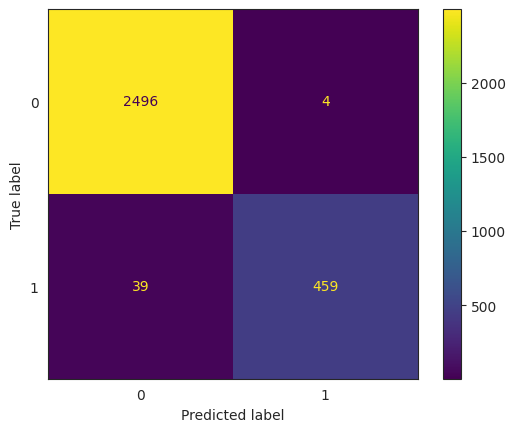

In [104]:
cm = confusion_matrix(y_test,y_pred_rf,labels = rf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = rf_1.classes_)
disp.plot(values_format ='');

The false positives in this model are small in number but slightly higher than the decision tree, while false negatives are lower (4) than the single tree (13).

But this model predicts the attrition better, and if employee retention is the primary goal, this model will perform really well.

In [111]:
rf_importance = pd.DataFrame(rf_1.best_estimator_.feature_importances_,columns=['rf_gini_importance'],
             index=X.columns).sort_values(by='rf_gini_importance', ascending=False)

feature_importance = pd.concat([feature_importance,rf_importance[:10]],axis=1)

feature_importance[:5]


,dt_gini_importance,rf_gini_importance
satisfaction_level,0.494657,0.326384
last_evaluation,0.167871,0.126160
number_project,0.130254,0.189680
tenure,0.124432,0.170009
average_montly_hours,0.081368,0.156405


The top 5 important features used by our random forest model remained same as in the decision tree - **satisfaction_level, last_evaluation, number_project, tenure, average_monthly_hours**

### Summary of model results

Logistic Impression performed worst among the four models with an f1 value of only 0.33.
Among the other models, Random Forest performed the best (f1 = 0.955255) on the test set, while decision tree came second with an f1 value of 0.949640.

### Conclusion, Recommendations, Next Steps


1. Average Monthly hours, number of projects, satisfaction level, and evaluation  are the top features
Satisfaction remained the top feature in all models. Further analysis and modeling is need to create classification models without "satisfaction_level" as a feature since when scaled across the organization, this metric may not be availble for all the employees

2. The working hours should be studied at the company to improve the overall culture. Most employees are over-worked and thus some high performing employees with good ratings leave.
The number of projects should also be looked into. 3-4 seems like the ideal number of projects for employees.

3. There can be some dependencies or data leakage in the current model given that satisfaction_level comes out as the top feature. Even average_monthly_hours can have the same effect, with employees who already planned to leave may choose to work less hours than average. So more refined models can be created by removing these features.

